In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from varclushi import VarClusHi

In [2]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

base = pd.read_csv('additional_data/base.csv')

backfill = pd.read_csv('additional_data/imputed_sets/backfill.csv')
yearly_mean = pd.read_csv('additional_data/imputed_sets/Yearly Mean.csv')
overall_mean = pd.read_csv('additional_data/imputed_sets/Overall Mean.csv')
regional_mean = pd.read_csv('additional_data/imputed_sets/Yearly Mean per Region.csv')
interpolation_all = pd.read_csv('additional_data/imputed_sets/Interpolate all.csv')
interpolation_3 = pd.read_csv('additional_data/imputed_sets/Interpolate 3.csv')
ice1 = pd.read_csv('additional_data/imputed_sets/ICE 1.csv')
ice2 = pd.read_csv('additional_data/imputed_sets/ICE 2.csv')
ice3 = pd.read_csv('additional_data/imputed_sets/ICE 3.csv')
mice1 = pd.read_csv('additional_data/imputed_sets/MICE 1.csv')
mice2 = pd.read_csv('additional_data/imputed_sets/MICE 2.csv')
knn1 = pd.read_csv('additional_data/imputed_sets/KNN 1.csv')
knn2 = pd.read_csv('additional_data/imputed_sets/KNN 2.csv')

sets =  {'Backfill': backfill, 'Overall Mean':overall_mean, 
              'Yearly Mean':yearly_mean, 'Yearly Mean per Region':regional_mean, 
              'Interpolate 3':interpolation_3, 'Interpolate all':interpolation_all, 
              'ICE 1':ice1, 'ICE 2':ice2, 
              'ICE 3':ice3, 'MICE 1':mice1, 'MICE 2':mice2, 
              'KNN 1':knn1, 'KNN 2':knn2
             }

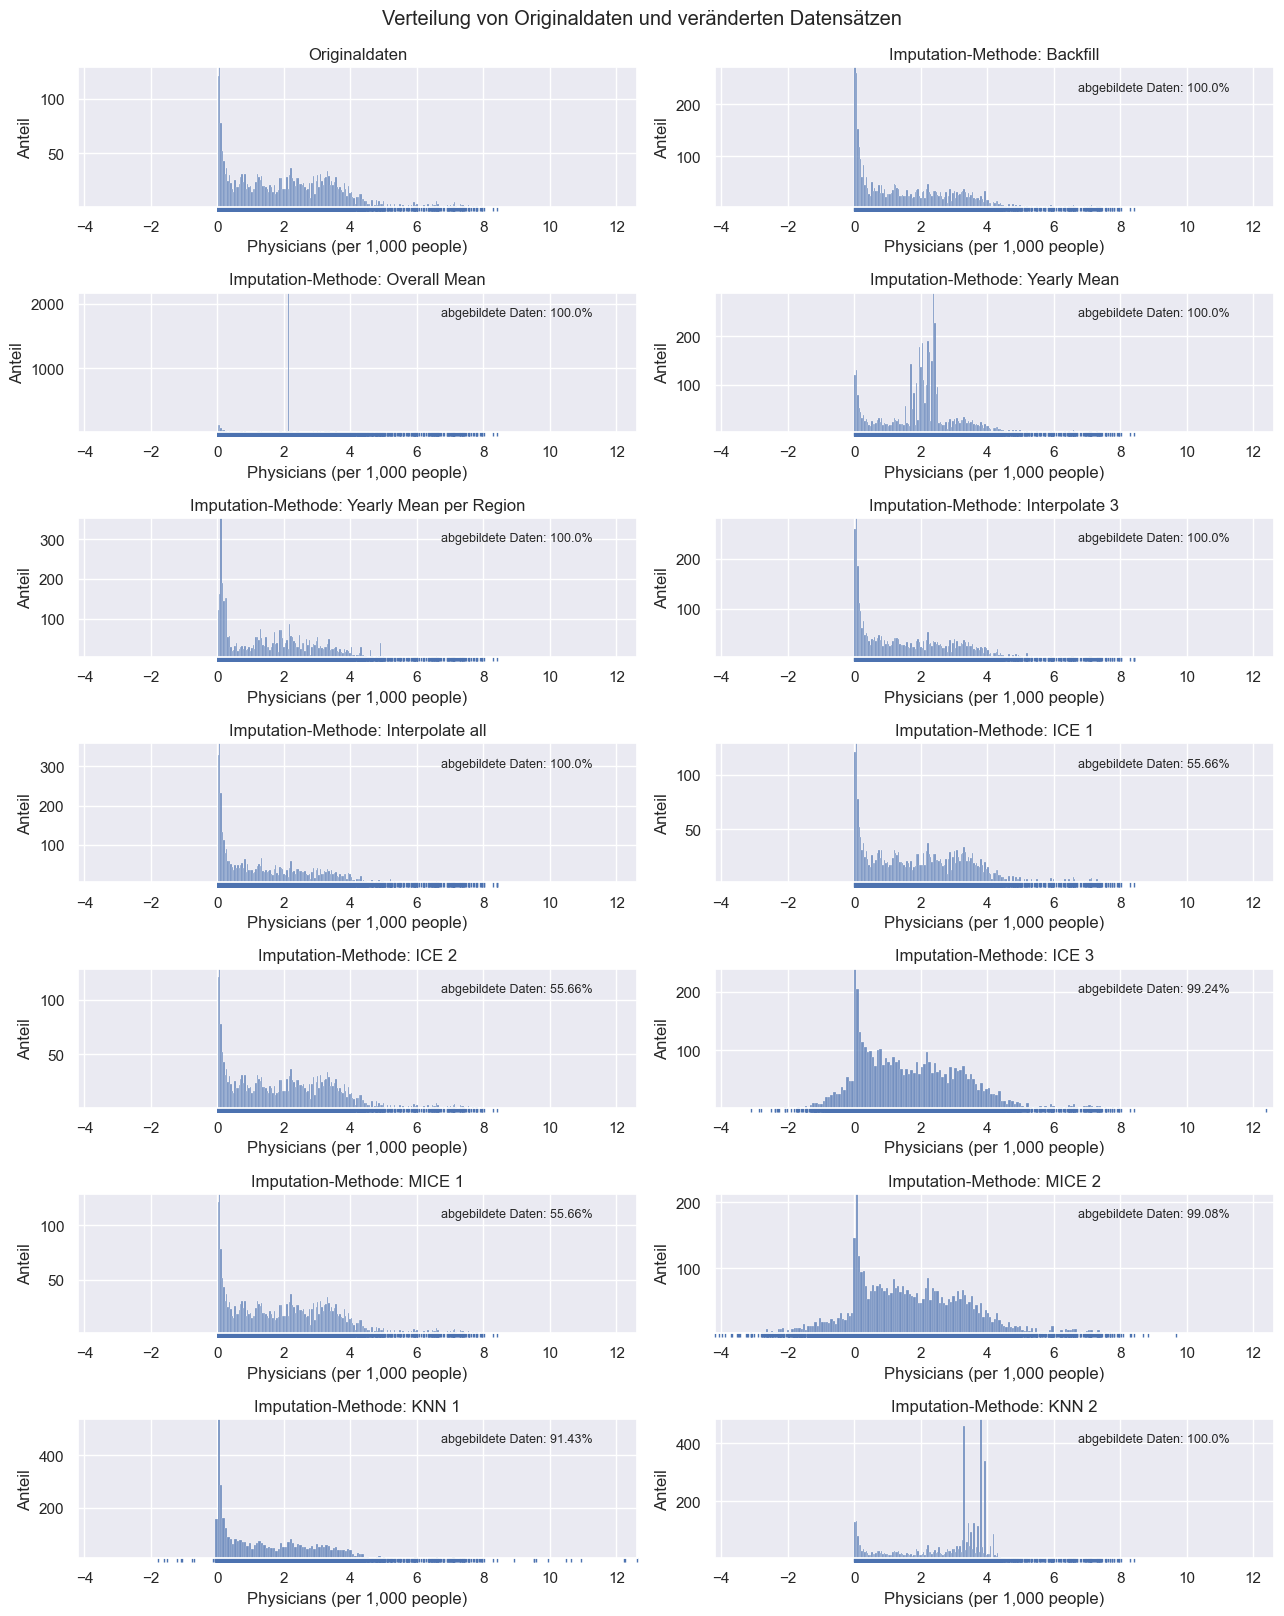

In [4]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(7,2, figsize=(13, 17))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

df_min = df_base.stack().min()
df_max = df_base.stack().max()

xmin = df_min-(df_max-df_min)*0.5
xmax = df_max+(df_max-df_min)*0.5

sns.histplot(data=df_base.stack(), bins=200, stat='count', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel(x)
axs[0].set_xlim(xmin, xmax)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name']).stack()
    total =len(df_i)
    df_i = df_i.loc[(df_i>xmin) & (df_i<xmax)]
    frac =len(df_i)
    sns.histplot(data=df_i, bins=200, stat='count', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i, height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].text(0.65, 0.9, f"abgebildete Daten: {round((frac/total)*100, 2)}%", 
                    ha="left", va="top", transform=axs[idx+1].transAxes, fontsize=9)

    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Anteil')
    axs[idx+1].set_xlabel(x)
    axs[idx+1].set_xlim(xmin, xmax)
    
plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.savefig('figures/results/density_education_all')

In [3]:
new = pd.read_csv('additional_data/chosen_indicators.csv', sep=';')
new.dropna(subset=['percentage'], inplace=True)
new.drop('percentage', axis=1, inplace=True)

In [4]:
table = []
for name, df in sets.items():
    df = df.set_index(['Country Name', 'Indicator Name'])
    df = df.loc[df.index.isin(new['indicators'], level='Indicator Name')]
    n = (df>100).sum().sum()
    table.append([name, n])

In [5]:
table = pd.DataFrame(table, columns=['Datensatz', 'logische Fehler'])
table = table.set_index('Datensatz')
print(table.to_latex(label='tab:logic', caption='Prozentwerte \>100 für Indikatoren die diese nicht zulassen.'))

\begin{table}
\centering
\caption{Prozentwerte \>100 für Indikatoren die diese nicht zulassen.}
\label{tab:logic}
\begin{tabular}{lr}
\toprule
{} &  logische Fehler \\
Datensatz              &                  \\
\midrule
Backfill               &                0 \\
Overall Mean           &                0 \\
Yearly Mean            &                0 \\
Yearly Mean per Region &                0 \\
Interpolate 3          &                0 \\
Interpolate all        &                0 \\
ICE 1                  &            54679 \\
ICE 2                  &            49681 \\
ICE 3                  &             4361 \\
MICE 1                 &            51045 \\
MICE 2                 &             4113 \\
KNN 1                  &            16758 \\
KNN 2                  &                0 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\mbfbr\AppData\Local\Temp\ipykernel_19976\2651310779.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(label='tab:logic', caption='Prozentwerte \>100 für Indikatoren die diese nicht zulassen.'))


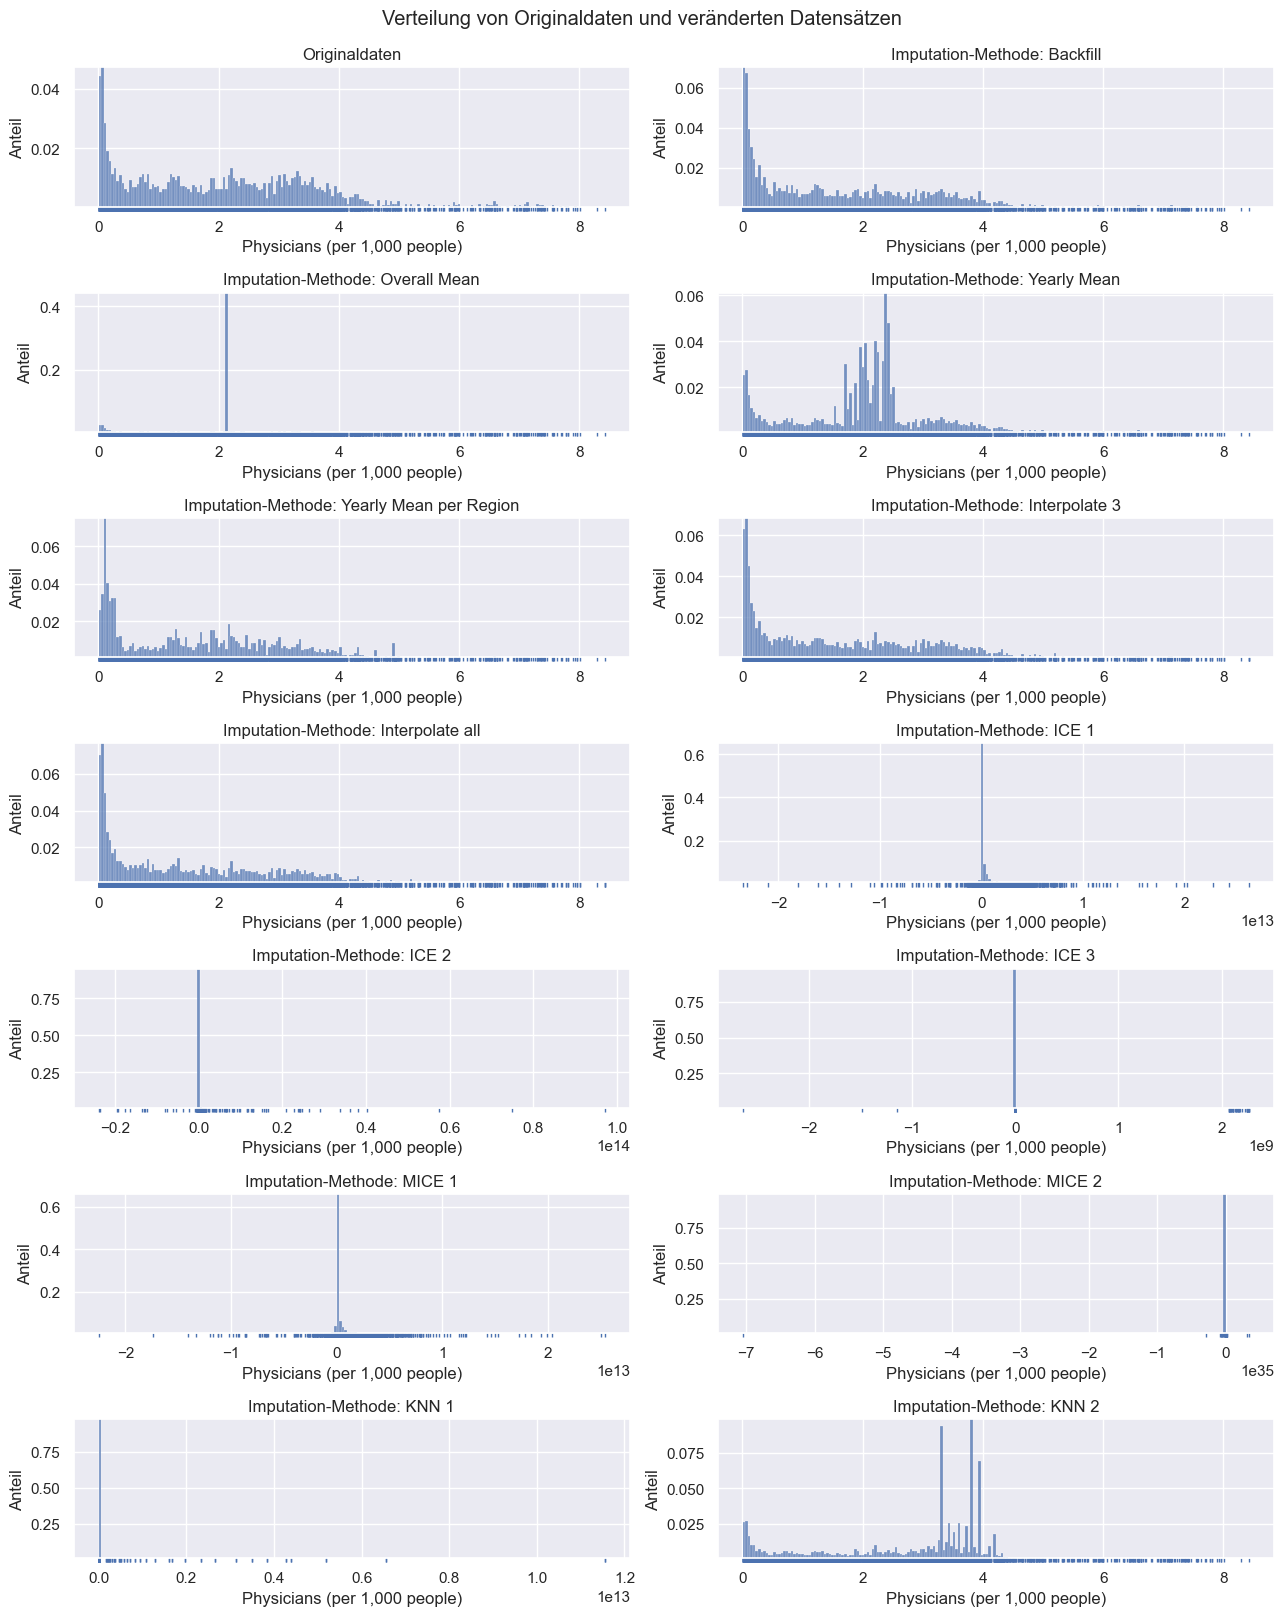

In [7]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")

fig, axs = plt.subplots(7,2, figsize=(13, 17))
axs = axs.ravel()


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
sns.histplot(data=df_base.stack(), bins=200, stat='proportion', legend=False, ax=axs[0])
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=axs[0])
axs[0].set_title('Originaldaten')
axs[0].set_ylabel('Anteil')
axs[0].set_xlabel(x)


for idx, (name, df) in enumerate(sets.items()):
    df_i = df.loc[df['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
    sns.histplot(data=df_i.stack(), bins=200, stat='proportion', legend=False, ax=axs[idx+1])
    sns.rugplot(data=df_i.stack(), height=-.03, clip_on=False, ax=axs[idx+1])
    axs[idx+1].set_title(f'Imputation-Methode: {name}')
    axs[idx+1].set_ylabel('Anteil')
    axs[idx+1].set_xlabel(x)


plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
#plt.savefig('figures/results/density_education')

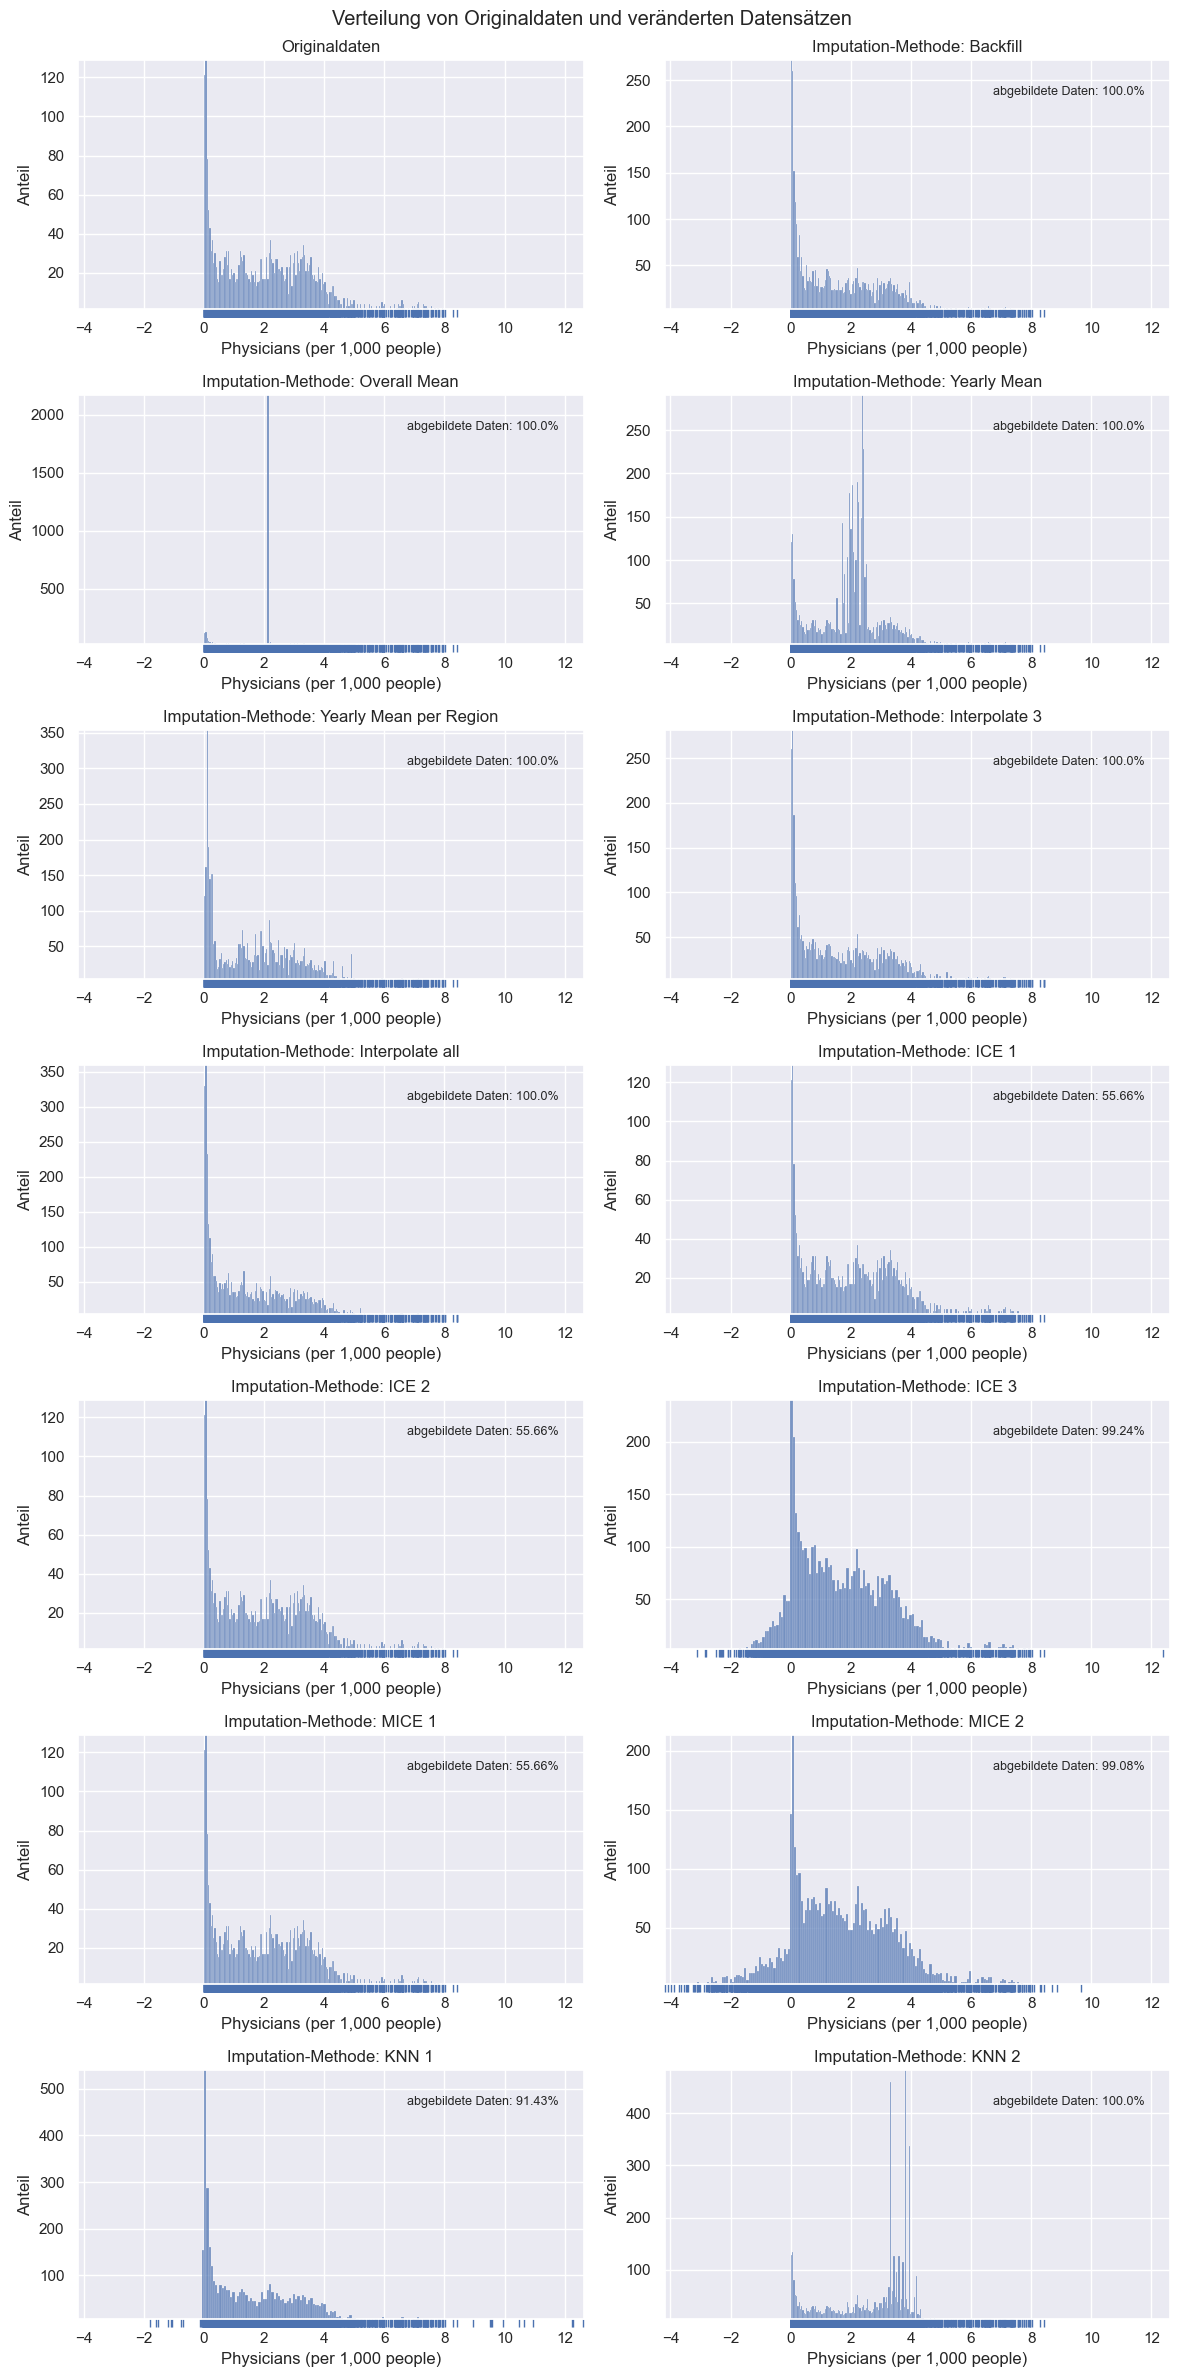

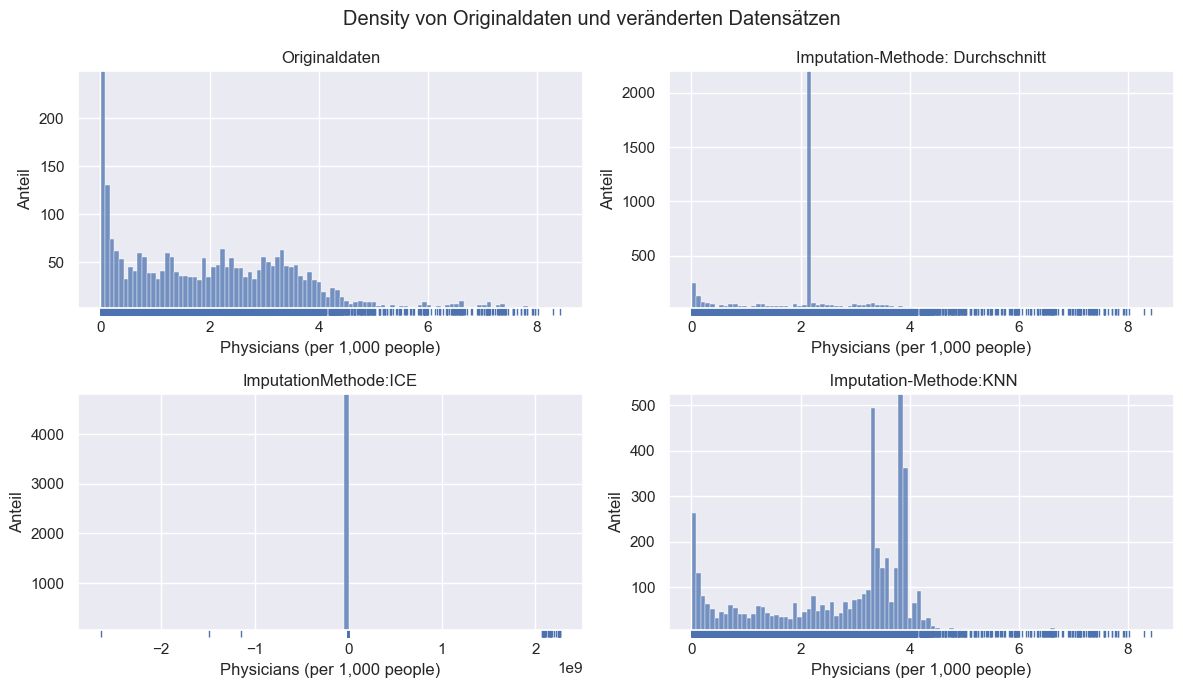

In [9]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_mean = overall_mean.loc[overall_mean['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_ice3 = ice3.loc[ice3['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_knn = knn2.loc[knn2['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 7), nrows=2, ncols=2)


sns.histplot(data=df_base.stack(), bins=100, stat='count', legend=False, ax=ax1)
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=ax1)
#sns.kdeplot(data=df_base.stack(), ax=ax1)
ax1.set_title('Originaldaten')
ax1.set_ylabel('Anteil')
ax1.set_xlabel(x)

sns.histplot(data=df_mean.stack(), bins=100, stat='count', legend=False, ax=ax2)
sns.rugplot(data=df_mean.stack(), height=-.03, clip_on=False, ax=ax2)
#sns.kdeplot(data=df_base.stack(), ax=ax2)
ax2.set_title('Imputation-Methode: Durchschnitt')
ax2.set_ylabel('Anteil')
ax2.set_xlabel(x)

sns.histplot(data=df_ice3.stack(), bins=100, stat='count', legend=False, ax=ax3)
sns.rugplot(data=df_ice3.stack(), height=-.03, clip_on=False, ax=ax3)
#sns.kdeplot(data=df_base.stack(), ax=ax3)
ax3.set_title('ImputationMethode:ICE')
ax3.set_ylabel('Anteil')
ax3.set_xlabel(x)

sns.histplot(data=df_knn.stack(), bins=100, stat='count', legend=False, ax=ax4)
sns.rugplot(data=df_knn.stack(), height=-.03, clip_on=False, ax=ax4)
#sns.kdeplot(data=df_base.stack(), ax=ax4)
ax4.set_title(' Imputation-Methode:KNN')
ax4.set_ylabel('Anteil')
ax4.set_xlabel(x)

plt.suptitle('Density von Originaldaten und veränderten Datensätzen')
plt.tight_layout()
plt.savefig('figures/results/density_phyicians')